<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/investigacion_dengue/blob/main/machine_learning/1_time_series/5_seminario/Seminario_5_time_series_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo](https://www.youtube.com/watch?v=s3ZlBppS7gE)

# Vocabulary

* Timestamps: Marcas de tiempo
* datetime objects: objetos de fecha y hora.
*  

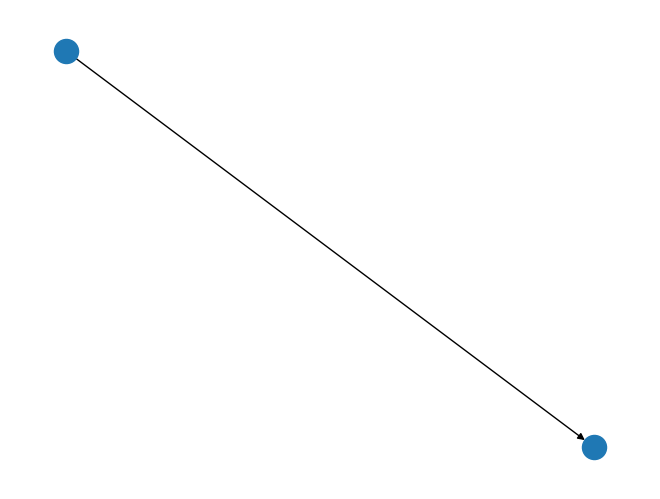

In [54]:
import networkx as nx 

from matplotlib import pyplot as pyplot

# crear grafo para el mapa conceptual
G = nx.DiGraph()

# agregar nodos al grafo

G.add_node('Series de tiempo')
G.add_node('Pandas', parent = 'Series de tiempo')

#agregar relaciones entre nodos

G.add_edge('Series de tiempo', 'Pandas')

# dibujar el mapa

pos = nx.spring_layout(G, seed = 42) # ubicación de los nodos

nx.draw(G, pos)







# Time Series Basics 

A basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects:

In [2]:
import numpy as np 
import pandas as pd 
from datetime import datetime 

In [4]:
fechas = [datetime(2023, 9, 6), datetime(2023, 9, 7), \
         datetime(2023, 9, 8), datetime(2023, 9, 9), \
            datetime(2023, 9, 10), datetime(2023, 9, 11),\
                                             datetime(2023, 9, 12)]

In [10]:
serie_tiempo = pd.Series(np.random.normal(loc = 0.0, scale = 1.0, size = 7), index = fechas)

In [11]:
serie_tiempo 

2023-09-06    0.857448
2023-09-07    0.942313
2023-09-08   -0.629480
2023-09-09   -0.664762
2023-09-10   -0.516208
2023-09-11    1.127840
2023-09-12   -0.481202
dtype: float64

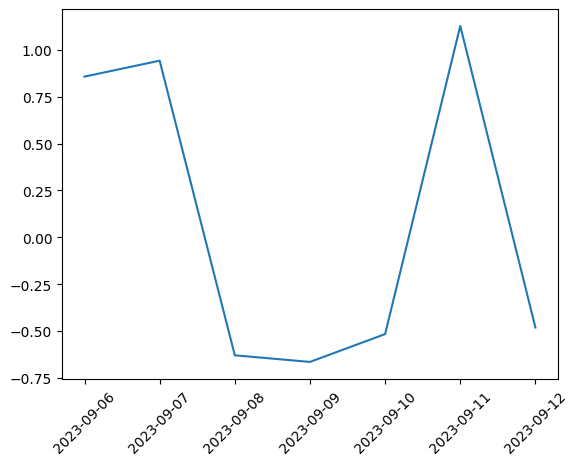

In [47]:
import matplotlib.pyplot as plt 

plt.plot(serie_tiempo)

plt.xticks(rotation = 45)

plt.savefig('/sysroot/home/marco/Documentos/investigacion/investigacion_dengue/machine_learning/images/serie_tiempo_artificial_1.jpg')

## Tarea

Visualice la temperatura en un día de caucasia medido por la estación del Proyecto Antioquia mira su cielo 

In [40]:
url = "https://raw.githubusercontent.com/marco-canas/didactica_ciencia_datos/main/3_datasets/antioquia_mira_su_cielo/A2022M11/DatosEstacion2022-11-16.csv"
datos_noviembre_16_2022 = pd.read_csv(url)

In [41]:
datos_noviembre_16_2022.keys()

Index(['Tiempo Sistema', 'Bar Trend', 'Next Record', 'Barometer',
       'Inside Temperature', 'Inside Humidity', 'Outside Temperature',
       'Wind Speed', '10 Min Avg Wind Speed', 'Wind Direction',
       'Extra Temperatures', 'Soil Temperatures', 'Leaf Temperatures',
       'Outside Humidity', 'Extra Humidties', 'Rain Rate', 'UV',
       'Solar Radiation', 'Storm Rain', 'Start Date of current Storm',
       'Day Rain', 'Month Rain', 'Year Rain', 'Day ET', 'Month ET', 'Year ET',
       'Soil Moistures', 'Leaf Wetnesses', 'Inside Alarms', 'Rain Alarms',
       'Outside Alarms', 'Extra Temp/Hum Alarms', 'Soil & Leaf Alarms',
       'Transmitter Battery Status', 'Console Battery Voltage',
       'Forecast Icons', 'Forecast Rule number', 'Time of Sunrise',
       'Time of Sunset', '<LF> = 0x0A', '<CR> = 0x0D', 'CRC'],
      dtype='object')

In [45]:
temperatura_26_nov_2022 = pd.Series(datos_noviembre_16_2022['Outside Temperature'].values,\
                                     index = datos_noviembre_16_2022['Tiempo Sistema'].values) 

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

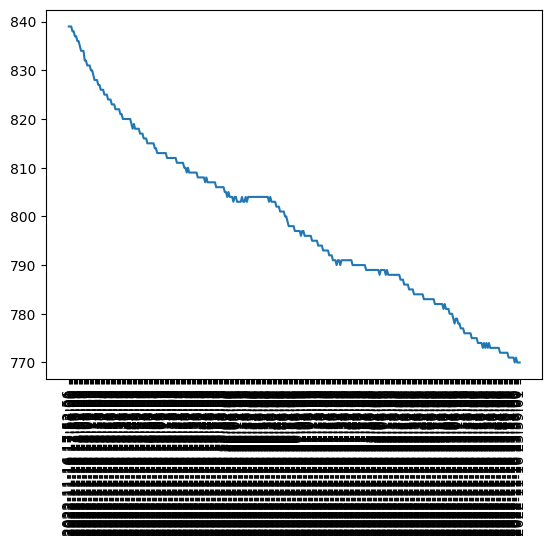

In [46]:
plt.plot(temperatura_26_nov_2022)
plt.xticks(rotation = 90)

Under the hood, these datetime objects have been put in a DatetimeIndex :

In [12]:
serie_tiempo.index 

DatetimeIndex(['2023-09-06', '2023-09-07', '2023-09-08', '2023-09-09',
               '2023-09-10', '2023-09-11', '2023-09-12'],
              dtype='datetime64[ns]', freq=None)

Like other Series, arithmetic operations between differently indexed time series automatically align on the dates:

In [14]:
serie_tiempo + serie_tiempo[::2]

2023-09-06    1.714896
2023-09-07         NaN
2023-09-08   -1.258960
2023-09-09         NaN
2023-09-10   -1.032415
2023-09-11         NaN
2023-09-12   -0.962404
dtype: float64

Recuerde que `ts[::2]` selecciona uno de cada dos elementos en ts.  

pandas almacena marcas de tiempo utilizando el tipo de datos datetime64 de NumPy con una resolución de nanosegundos:

In [15]:
serie_tiempo.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas Timestamp objects:

In [17]:
stamp = serie_tiempo.index[0]
stamp

Timestamp('2023-09-06 00:00:00')

Una marca de tiempo se puede sustituir en cualquier lugar donde usaría un objeto de fecha y hora. Además, puede almacenar información de frecuencia (si corresponde) y comprende cómo calcular el tiempo.
conversiones de zona y otros tipos de manipulaciones. Más sobre ambas cosas más adelante.


# Indexación, selección, subconjuntos


Las series de tiempo se comportan como cualquier otro pandas.Series cuando indexa y selecciona datos según la etiqueta:

In [21]:
momento_o_instante = serie_tiempo.index[0]
momento_o_instante

Timestamp('2023-09-06 00:00:00')

In [22]:
serie_tiempo[momento_o_instante]

0.8574481561949644

## Conclusión: Con la fecha y hora, puedo acceder a los valores asociados a esa fecha con notación de corchetes. 

As a convenience, you can also pass a string that is interpretable as a date:

In [24]:
serie_tiempo['2023/09/06']

0.8574481561949644

In [26]:
serie_tiempo['20230906']

0.8574481561949644

In [27]:
serie_tiempo['2023-9-6']

0.8574481561949644

For longer time series, a year or only a year and month can be passed to easily select slices of data:

In [30]:
series_de_tiempo_grandes = pd.Series(np.random.normal(loc = 0.0, scale = 1.0, size = 1000), \
                                     index = pd.date_range('1/1/2023', periods = 1000))

In [31]:
series_de_tiempo_grandes

2023-01-01    0.707484
2023-01-02    1.229471
2023-01-03    2.107968
2023-01-04    2.563750
2023-01-05    1.384604
                ...   
2025-09-22    0.890416
2025-09-23   -1.309018
2025-09-24   -0.019717
2025-09-25   -0.266972
2025-09-26   -0.349368
Freq: D, Length: 1000, dtype: float64

In [35]:
series_de_tiempo_grandes['2025']

2025-01-01    0.965306
2025-01-02    1.012710
2025-01-03    0.362164
2025-01-04   -1.108958
2025-01-05   -1.033031
                ...   
2025-09-22    0.890416
2025-09-23   -1.309018
2025-09-24   -0.019717
2025-09-25   -0.266972
2025-09-26   -0.349368
Freq: D, Length: 269, dtype: float64

### Conclusiones : 

Pandas, facilita la manipulación de series de tiempo a través de la estructura de datos llamada serie. 

## Referentes

* [Documentación de la función numpy.random.normal(loc = 0.0, scale =1.0, size  =7)](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)

* [McKinney, W. (2022). Python for data analysis. " O'Reilly Media, Inc."](https://d1wqtxts1xzle7.cloudfront.net/62139307/Python-for-Data-Analysis-2nd-Edition20200219-40214-1of6b7q-libre.pdf?1582110463=&response-content-disposition=inline%3B+filename%3DPython_for_Data_Analysis.pdf&Expires=1694047785&Signature=Tb-08k~n9serYyJmgGx1Ft0gt~fh85tEU8CB7cLuQHgoY~3DxmxUMofZlGKlHMhXoouR6dk5y4o8hYwE7QDSm1SARmcDVvRTLj7rGYIZE7d6Y4uCO6snbQODwitUUdqEh1t3Z0RHDOtL9k6z5F0CyAo9OU0i8WKUwvecPIYtiULB-okyif8zFfErGSyWyxaNZJnIJZ1t2Nuboq-sNa5UTliUL21trajob5ie~39ymEfaQUZyRbW1SQ8wS1fLQJPZDIzf9O77TfIkSE~VghxPqs5NWVJ5yyZxKx-MsmapLA1oJTA6xsXbG0uqvdFj1wXbaRyB0sOVX0aB~K3qm9G7BA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA)